***
***
***

<br><h2>Session 9 | Clustering</h2>
<h4>DAT-5303 | Machine Learning</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

***
***
***

<h3>Part I: Introduction and Preparation</h3><br>

<strong>Clustering</strong><br>
The concept of this technique is to divide the data into groups (i.e. clusters). There are several methods to accomplish this, but generally one of the following will occur:
* observations will be grouped based on their similarities
* observations will be separated based on their differences

<br>
Reminder: Distance-based unsupervised learning techniques require variance scaling.

<br><br>
<strong>Challenge 1</strong><br>
Complete the code to import the following packages under their standard naming conventions:
* pandas
* matplotlib.pyplot
* seaborn
* StandardScaler
* PCA

In [1]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


***
***

<br>
Run the following code to import new packages, load the dataset, and set print options.

In [3]:
########################################
# importing new packages
########################################
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
customers_df = pd.read_excel('top_customers_subset.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

***
***

<br>
<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [4]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***
***

<br>
<h3>Part II: Agglomerative Clustering</h3><br>
Agglomerative clustering starts where each observation is its own cluster. From there, it links observations  based on distance. There are three primary methods for calculating distance:<br><br>

    ward (default) - groups observations into clusters in a way that minimizes 
    the variance amongst all clusters. Leads to clusters that are relatively
    equal in size

    average - merges clusters that have the smallest average distance
    between all their points

    complete - merges clusters that have the smallest maximum distance
    between their points

<br><br>
<u>Primary Advantage</u><br>
Able to generate a dendrogram to better understand data groupings and help determine the final number of clusters to develop.
<br><br><br>
<u>Primary Disadvantage</u><br>
Unable to predict on new data.<br><br>

<strong>Challenge 2</strong><br>
Complete the code to prepare a scaled version of the dataset.

In [5]:
# dropping demographic information
purchase_behavior = customers_df.drop(['Channel', 'Region'],
                                      axis = 1)


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(purchase_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(purchase_behavior)


# converting scaled data into a DataFrame
purchases_scaled = pd.DataFrame(X_scaled)


# reattaching column names
purchases_scaled.columns = purchase_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(purchase_behavior), '\n\n')
print(pd.np.var(purchases_scaled))

Mediterranean     1.595914e+08
Vegan             5.434617e+07
Vegetarian        9.010485e+07
Middle Eastern    2.351429e+07
Indian            2.268077e+07
Wine              7.934923e+06
dtype: float64 


Mediterranean     1.0
Vegan             1.0
Vegetarian        1.0
Middle Eastern    1.0
Indian            1.0
Wine              1.0
dtype: float64


/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
/Users/stephaniedominguezandrade/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


***
***

<br>
Run the following code to develop a dendrogram.

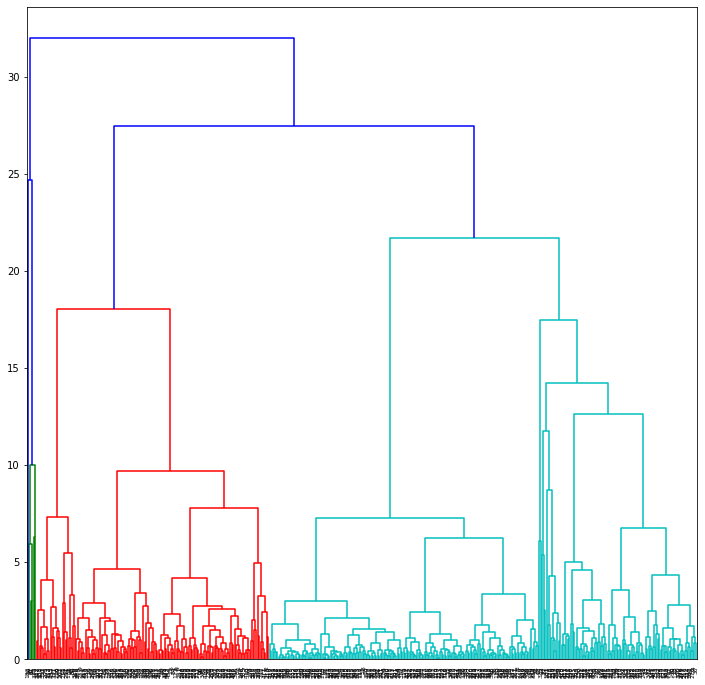

In [6]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = purchases_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

***
***

<br>
<strong>Challenge 3</strong><br>
Call the inertia_plot function to help determine the number of clusters to build.

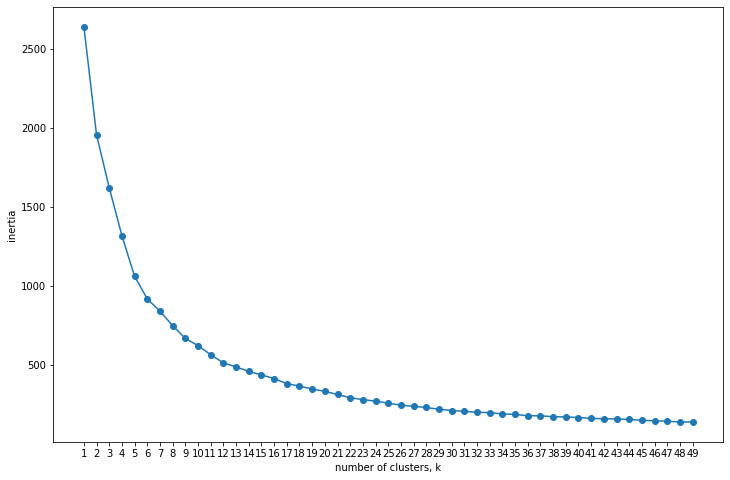

In [9]:
# calling the inertia_plot() function
interia_plot(data = purchases_scaled)

***
***

<br>
<h3>Part III: k-Means Clustering</h3><br>
If we know how many clusters we would like to build, we can take advantage of k-means clustering. This is a more robust way to create clusters and is also a technique that can be used to predict on new data.

In [14]:
# INSTANTIATING a model object with k clusters
customers_k3 = KMeans(n_clusters = 2,
                      random_state = 802)


# FITTING to the scaled data
customers_k3.fit(purchases_scaled)


# saving cluster labels as a DataFrame
clusters = pd.DataFrame({'cluster': customers_k3.labels_})


# checking the results
print(clusters['cluster'].value_counts())

1    404
0     36
Name: cluster, dtype: int64


***
***

<br>
We can use <strong>centriods</strong> (i.e. variable averages) to help interpret each cluster. This will help us to understand the characteristics of each potential segment in our data.

In [15]:
# saving cluster centers
centroids = customers_k3.cluster_centers_


# converting centriods into a DataFrame
centroids_df = pd.DataFrame(centroids)


# renaming columns
centroids_df.columns = customers_df.iloc[ : , 2:].columns


# checking the results
centroids_df.round(2)

,Mediterranean,Vegan,Vegetarian,Middle Eastern,Indian,Wine
0,0.12,2.19,2.39,0.39,2.44,0.93
1,-0.01,-0.19,-0.21,-0.03,-0.22,-0.08


***

In [ ]:
# saving the data to Excel
centroids_df.to_excel('customers_k3_centriods.xlsx')

***
***

<br>
<strong>Challenge 4</strong><br>
Complete the following code to develop a model with six clusters based on k-means.

In [17]:
# INSTANTIATING a k-means object with 6 clusters
customers_k6 = KMeans(n_clusters = 6,
                      random_state = 802)

# FITTING to the scaled data
customers_k6.fit(purchases_scaled)


# converting to a DataFrame
customers_k6_clusters = pd.DataFrame({'cluster': customers_k6.labels_})


# checking the results
print(customers_k6_clusters.iloc[: , 0].value_counts())

0    280
1     98
4     49
3     10
5      2
2      1
Name: cluster, dtype: int64


***
***

<br>
<strong>Challenge 5</strong><br>
Complete the following code to output cluster centroids.

In [19]:
# saving cluster centriods
centroids_k6 = customers_k6.cluster_centers_


# converting centroids to a DataFrame
centroids_k6_df = pd.DataFrame(centroids_k6)


# renaming columns
centroids_k6_df.columns =  customers_df.iloc[ : , 2:].columns


# checking results (rounded to two decimal places)
centroids_k6_df.round(2)

,Mediterranean,Vegan,Vegetarian,Middle Eastern,Indian,Wine
0,-0.21,-0.38,-0.44,-0.08,-0.40,-0.19
1,-0.49,0.67,0.91,-0.32,0.89,0.15
2,1.97,5.18,1.29,6.90,-0.55,16.48
3,0.31,3.92,4.28,-0.00,4.62,0.50
4,2.06,-0.07,-0.21,0.61,-0.40,0.30
5,0.79,0.56,-0.01,9.25,-0.46,0.93


***

In [20]:
centroids_k6_df.to_excel('cutomers_k6_centriods.xlsx')

***
***

<br>
Adding cluster number to original observations.

In [23]:
# concatenating cluster labels
customers_df_plus = pd.concat([customers_df, pd.Series(customers_k6.labels_)],
                              axis = 1)


# renaming columns
customers_df_plus.columns = ['Channel', 'Region', 'Mediterranean', 'Vegan',
                             'Vegetarian', 'Middle Eastern', 'Indian', 'Wine',
                             'Cluster']


# sending results to Excel
customers_df_plus.to_excel('customer_clusters.xlsx')


# checking results
customers_df_plus.sort_values(by=['Cluster'])

,Channel,Region,Mediterranean,Vegan,Vegetarian,Middle Eastern,Indian,Wine,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
277,1,3,9061,829,683,16919,621,139,0
275,1,3,680,1610,223,862,96,379,0
274,1,3,894,1703,1841,744,759,1153,0
272,1,1,514,8323,6869,529,93,1040,0
271,1,1,2083,5007,1563,1120,147,1550,0
270,1,1,4720,1032,975,5500,197,56,0
269,1,1,15218,258,1138,2516,333,204,0
267,1,1,20893,1222,2576,3975,737,3628,0
278,1,3,11693,2317,2543,5845,274,1409,0


***
***

<br>

~~~
_________ .__                  __                       
\_   ___ \|  |  __ __  _______/  |_  ___________  ______
/    \  \/|  | |  |  \/  ___/\   __\/ __ \_  __ \/  ___/
\     \___|  |_|  |  /\___ \  |  | \  ___/|  | \/\___ \ 
 \______  /____/____//____  > |__|  \___  >__|  /____  >
        \/                \/            \/           \/ 
        _____                                           
  _____/ ____\                                          
 /  _ \   __\                                           
(  <_> )  |                                             
 \____/|__|                                             
                                                        
  _________                                       ._.   
 /   _____/__ __   ____  ____  ____   ______ _____| |   
 \_____  \|  |  \_/ ___\/ ___\/ __ \ /  ___//  ___/ |   
 /        \  |  /\  \__\  \__\  ___/ \___ \ \___ \ \|   
/_______  /____/  \___  >___  >___  >____  >____  >__   
        \/            \/    \/    \/     \/     \/ \/   
          
~~~